## L1 cərimələndirmə (L1 regularization) və ya Lasso Regression

Bu düstur **L1 cərimələndirmə (L1 regularization) və ya Lasso Regression** üçün obyektiv funksiyanı ifadə edir. Bu metod **modeldə dəyişən seçimi (feature selection)** etmək və **overfitting-in qarşısını almaq** üçün istifadə olunur.

---

### **Düsturun açılışı və izahı:**
$$
\tilde{L}_i(\omega) = L_i(\omega) + \lambda \|\omega\|_1 = L_i(\omega) + \lambda \sum_{j=1}^{n} |\omega_j| \to \min_{\omega}
$$

#### **İzah:**
Bu ifadə **orijinal itki funksiyasına əlavə olaraq L1 cərimələndirmə** əlavə edən optimallaşdırma problemidir.

- **$L_i(\omega)$** – Əsas itki funksiyası (məsələn, MSE və s.)
- **$\lambda \|\omega\|_1$** – **L1 norması ilə cərimələndirmə**:
  - **$\lambda$** – Cərimələndirmə parametri.
  - **$\|\omega\|_1 = \sum |\omega_j|$** – Əmsalların **modullarının cəmi** (L1 norması).
- Məqsəd: Bu funksiyanı **minimallaşdırmaq**.

---

### **L1 və L2 fərqi nədir?**

| Özəllik | L1 (Lasso) | L2 (Ridge) |
|--------|------------|------------|
| Cərimə forması | $\sum \lvert \omega_j \lvert $ | $\sum \omega_j^2$ |
| Bəzi əmsalları **tam sıfıra** endirirmi? | ✅ Bəli (Feature Selection edir) | ❌ Xeyr |
| Əmsalları sadəcə kiçildirmi? | ✅ + sıfıra çatdırır | ✅ Kiçildir, sıfıra çatdırmır |
| Multikolinearlıqda davranışı | Birini seçib digərlərini sıfırlayır | Hamısını kiçildir |
| Sparse (azsaylı əhəmiyyətli dəyişənli) model üçün uyğundurmu? | ✅ Əla uyğundur | ❌ O qədər də yox |

---

### **Niyə L1 (Lasso) istifadə edirik?**
1. **Dəyişən Seçimi (Feature Selection):** Lasso bəzi dəyişənlərin əmsalını **tam sıfır** edir → sanki həmin sütunlar modeldən silinir.
2. **Sadələşdirilmiş Model:** Daha az dəyişənlərlə işlədiyi üçün model daha **oxunaqlı və şərh ediləbilən olur**.
3. **Overfitting-in qarşısı:** Cərimələndirmə modelin çox uyğunlaşmasının qarşısını alır.

---

### **$\lambda$ necə seçilir?**
- **Kiçik dəyərlər ($\lambda \approx 0.01$):** Az cərimə → Əksər dəyişənlər modeldə qalır.
- **Orta dəyərlər ($\lambda \approx 0.1 - 1$):** Bəzi dəyişənlər modeldən çıxarılır.
- **Böyük dəyərlər ($\lambda \gg 1$):** Demək olar ki, bütün əmsallar sıfıra yaxınlaşır → **underfitting** ola bilər.

**Ən yaxşı dəyər** üçün Cross-Validation və GridSearchCV istifadə olunur.

---

### **Lasso Regression tətbiqi (Python nümunəsi):**
```python
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Məlumat nümunəsi
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([2.2, 2.8, 3.6, 4.5])

# Lambda (alpha) namizədləri
lambda_values = [0.001, 0.01, 0.1, 1, 10]

# GridSearchCV ilə optimal lambda tapmaq
lasso = Lasso()
grid = GridSearchCV(lasso, {'alpha': lambda_values}, cv=5)
grid.fit(X, y)

# Ən yaxşı lambda dəyəri
print("Optimal lambda:", grid.best_params_['alpha'])
```

Burada `alpha` — L1 regularization gücünü göstərir. Əgər `alpha=0` olarsa, bu sıravi Linear Regression olacaq.

---

### **Nəticə:**
L1 Regularization və ya **Lasso Regression** modeli **daha az əhəmiyyətli dəyişənləri avtomatik çıxararaq** sadə və effektiv model qurmağa kömək edir. Bu üsul **overfitting** problemini azaldır və **daha interpretasiya oluna bilən modellər** yaradır. Ridge isə daha çox **bütün dəyişənlərin təsirini yumşaldır**, amma heç birini tam çıxarmır.

İkisini birləşdirən üsul da var – **ElasticNet**. Onu da istəsən əlavə edə bilərəm.

## Ridge (L2) və Lasso (L1) optimallaşdırma fərqi

Sualın çox yaxşıdır! Gəlin **L2** və **L1 regularization** modellərinin optimallaşdırma baxımından necə işlədiyinə aydınlıq gətirək:

---

## ✅ **L2 (Ridge Regression)**

### 💡 Cərimə:
$$
\frac{\lambda}{2} \sum_j \omega_j^2
$$

### 🔧 Optimallaşdırma:
- L2 regularization-da itki funksiyası **hamar və diferensial** (düzgün törəməli) olur.
- Bu səbəblə, **Gradient Descent** və ya **analitik həll** (yəni qapalı formul) ilə optimallaşdırmaq **çox rahatdır**.
- Hətta **normal equation** ilə də əmsallar tapıla bilər:
$$
\omega = (X^TX + \lambda I)^{-1}X^Ty
$$

---

## ✅ **L1 (Lasso Regression)**

### 💡 Cərimə:
$$
\lambda \sum_j |\omega_j|
$$

### ⚠️ Problem:
- **Modul funksiyası** — yəni $|\omega_j|$ — törəməyə görə **nöqtəli (nondifferentiable)** olur **sıfırda**.
- Yəni, $\omega_j = 0$ olan nöqtədə gradient yoxdur.
- Bu səbəbdən **adi gradient descent** Lasso üçün düzgün **işləməyə bilər**.

---

## 🔧 Bəs Lasso necə optimallaşdırılır?

Lasso regression üçün aşağıdakı metodlar istifadə olunur:

### ✔️ **Coordinate Descent**:
- Ən məşhur üsuldur.
- Hər dəfə **bir əmsal** üzərində optimallaşdırma aparır, digərlərini sabit saxlayır.
- Əmsalları **sıfıra doğru çəkir** və bəzi əmsalları **tam sıfır edir**.

### ✔️ **Subgradient Descent**:
- Modul funksiyasının törəməsi olmadığı yerlərdə **subgradient** (qismən törəmə) anlayışı istifadə olunur.

### ✔️ **LARS (Least Angle Regression)**:
- Kiçik datalar üçün **dəqiq və sürətli** üsuldur.
- Lasso ilə bağlı xüsusi algoritmdir.

---

## 📌 Nəticə:
| Xüsusiyyət | Ridge (L2) | Lasso (L1) |
|------------|------------|------------|
| Cərimə tipi | Kvadrat ($\omega^2$) | Modul ($ \lvert \omega \lvert $) |
| Əmsalların sıfırlanması | Yox | Bəli (bəziləri tam sıfır olur) |
| Optimallaşdırma | Analitik və ya Gradient Descent | Coordinate Descent, Subgradient, LARS |
| Törəmə mövcuddurmu? | Bəli (hamar) | Xeyr (nöqtəli) |

---

Əgər istəsən, mən sənə `sklearn` ilə `Lasso` tətbiqini də göstərə bilərəm. Və ya `ElasticNet` ilə müqayisəsini. Davam edək?

## L1 cəriməsi də L2 kimi tərs matris problemini həll etmək üçün istifadə olunurmu, yoxsa fərqli məqsədlədir



Çox gözəl sualdır! Sən demək istəyirsən ki:  
**"L1 cəriməsi də L2 kimi tərs matris problemini həll etmək üçün istifadə olunurmu, yoxsa fərqli məqsədlədir?"**

Qısa cavab:  
> **Yox, L1 (Lasso) tərs matris problemini həll etmək üçün istifadə olunmur. Başqa səbəblərlə istifadə olunur.**

---

### 📌 Daha ətraflı izah:

#### 🧠 L2 nə üçün tərs matrislə bağlıdır?

- L2 (Ridge) metodu **qeyri-invertible** və ya **xətti asılı** olan $X^TX$ matrisinə **pozitiv-diagonal** əlavə edir (yəni $\lambda I$).
- Bu isə **matrisi tərs ala biləcək hala gətirir**, yəni **təkmilləşdirilmiş numerik stabillik** verir.
- Ona görə də Ridge Regression-da **closed-form çözüm** mövcuddur.

---

#### ⚠️ L1 isə başqa məqsədlə istifadə olunur:

- L1 cəriməsində $|\beta|$ istifadə olunduğuna görə, bu **differentiable (törəməsi olan)** funksiya deyil – sıfırda törəməsi yoxdur.
- Buna görə də **tərs matrislə bağlı heç bir düstur yoxdur**.
- L1 cəriməsi **optimallaşdırma alqoritmləri** (məsələn, coordinate descent, subgradient descent) ilə həll olunur.

---

### 🎯 L1 istifadəsinin əsas səbəbi:

- **Sparsity yaratmaqdır** — yəni bəzi əmsalları **tam sıfır** etmək.
- Yəni, **modelə dəyişən seçmə qabiliyyəti qazandırır**.
- Bu xüsusilə çox dəyişənli, high-dimensional datalarda **feature selection** üçün vacib olur.

---

### 💡 Analogiya kimi:
> - L2: Modeli **yumşaq cərimə** ilə tənzimləyir. Tərs matris problemini də həll edir.
> - L1: Modeli **sadələşdirir**, lazımsız dəyişənləri kəsir. Amma tərs matris məsələsi ilə işi yoxdur.

---

Əgər istəyirsənsə, **ElasticNet**-ə də baxa bilərik. Bu metod həm L1, həm də L2-nin güclərini birləşdirir.

Davam edək?

## L1 (Lasso) necə qərar verir ki, filan sütun (feature) lazımlıdır, digəri isə sıfırlanmalıdır?



Super sualdır! Yəni sən demək istəyirsən:

> **"L1 (Lasso) necə qərar verir ki, filan sütun (feature) lazımlıdır, digəri isə sıfırlanmalıdır?"**

Bu qərar **sadə statistik "seçmək" yox**, **optimallaşdırma zamanı** yaranan **cərimə balansı** nəticəsində alınır.

Gəlin sadə şəkildə izah edim:

---

### 📌 L1 necə işləyir?

Lasso-nun məqsəd funksiyası budur:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Burada:
- $\sum (y_i - \hat{y}_i)^2$ — modelin **müvafiqlik (fit) dərəcəsini** ölçür.
- $\lambda \sum |\beta_j|$ — **L1 cəriməsi**, əmsalların böyüklüyünü **cəza** verir.

---

### 🤔 Niyə bəzi əmsallar sıfır olur?

1. **Əgər bir dəyişən (sütun) target ilə zəif əlaqəlidirsə**, onu modelə daxil etməyin faydası azdır.
2. Amma əmsalı sıfır olmayan halda, onun cəriməsi olur: $\lambda |\beta_j|$
3. **Model baxır:**
   > - **Bu sütun qalarsa, fit bir az yaxşılaşır.**
   > - **Amma cərimə də artır.**
4. Əgər **fit faydası, cəriməni "ödəməyə" dəymirsə**, o zaman $\beta_j = 0$ olur — **sütun "atılır"**.

---

### 🔎 Belə deyə bilərik:

L1 sanki **iqtisadi qərar** verir:
- “Bu dəyişəni saxlamaq mənə nə qazandıracaq?”
- “Amma onun üçün bu qədər cərimə ödəməliyəm. Dəyərmi?”

Əgər **cərimə > fayda** → çıxar!

---

### 📉 Hansı sütunlar daha çox risk altındadır?

- **Target ilə zəif korrelyasiya** olanlar  
- **Digər sütunlarla çox oxşar olan** (kolinear) dəyişənlər  
- **Noise** və ya az məlumat daşıyan sütunlar

---

### 🔄 Bonus: L1-in nəticələri data dəyişdikcə dəyişə bilər

Çünki əgər:
- $\lambda$ çox böyük seçilərsə → daha çox əmsal sıfırlanar  
- $\lambda$ çox kiçikdirsə → az cərimə olur, əksəriyyəti qalır

Ona görə də **ideal $\lambda$** seçmək üçün **cross-validation** istifadə olunur.

---

İstəyirsənsə bu qərarın necə verildiyini real nümunə və vizualla göstərim? Və ya ElasticNet ilə L1-in fərqini?

## Niyə $ x = 0 $ nöqtəsində $ x $ funksiyasının törəməsi var, amma $ |x| $ funksiyasının törəməsi  yoxdur?



> **Niyə $ x $ funksiyasının törəməsi var, amma $ |x| $ funksiyasının $ x = 0 $ nöqtəsində yoxdur?**

Gəlin bunu **fərq və səbəblərlə** aydınlaşdıraq:

---

### 🔹 1. $ y = x $ funksiyası:

Bu düz xəttdir — hər yerdə **hamardır** və **davamlı**dır.

- Törəməsi:
  $$
  \frac{d}{dx} x = 1
  $$
- Törəmə **bütün nöqtələrdə**, o cümlədən $ x = 0 $-da **vardır** və **bərabərdir 1**.

---

### 🔹 2. $ y = |x| $ funksiyası:

Bu funksiyanın qrafiki “V” formasındadır. İki hissəyə ayrılır:

$$
y =
\begin{cases}
-x, & x < 0 \\
x, & x \geq 0
\end{cases}
$$

- $ x < 0 $ üçün: törəmə $ -1 $
- $ x > 0 $ üçün: törəmə $ +1 $

---

### ❗ Problem haradadır?

$ x = 0 $-da **sol törəmə** ilə **sağ törəmə** **eyni deyil**:

$$
\lim_{x \to 0^-} \frac{d}{dx} |x| = -1 \quad \neq \quad \lim_{x \to 0^+} \frac{d}{dx} |x| = +1
$$

🔸 Bu o deməkdir ki, **törəmə ani "qırılma" yaşayır**, yəni **birbaşa dəyişir**. Bu cür nöqtələrə **kəskin bucaq** deyilir və bu nöqtədə törəmə **yoxdur**.

---

### 🔍 Sadə dillə:

- **$ x $** funksiyası: hamar xəttdir → hər yerdə törəmə var
- **$ |x| $** funksiyası: $ x = 0 $-da **kəskin dönüş** var → törəmə yoxdur

---

### 💡 Vizual fərq:

- $ y = x $: ↗️ — daim yuxarı qalxır (törəmə 1)
- $ y = |x| $: ↘️↗️ — ortada kəskin bucaq (törəmə dəyişir: -1 → +1)

### $ y = |x| $ funksiyasının $ x = 0 $ nöqtəsində törəməsinin **olmaması** 



### $ y = |x| $ funksiyasının $ x = 0 $ nöqtəsində törəməsinin **olmaması** məsələsinə gəldikdə, burada əsas olan **funksiyanın qrafiki** və **meylin (törəmənin) dəyişməsi** ilə bağlıdır.

### 1. **$ y = |x| $ funksiyasının qrafiki:**
$ y = |x| $ funksiyasının qrafiki aşağıdakı kimi olur:

- $ x = 0 $-da bir **kəskin dönüş** var, bu da **V** şəklində görünür.
- Bu dönüş $ x = 0 $-da iki fərqli meylin (törəmənin) olması ilə nəticələnir:  
  - **Soldan** (yəni $ x < 0 $) tərəfdən qrafik **mənfi tərəfə (təxminən -1) yığılır**.
  - **Sağdan** (yəni $ x > 0 $) tərəfdən isə qrafik **müsbət tərəfə (təxminən 1) yığılır**.

---

### 2. **Törəmənin mənası:**

Törəmə bir funksiyanın **davamlı şəkildə necə dəyişdiyini** göstərir. Yəni, törəmə **funksiyanın meylini** göstərir və bir nöqtədə **fərqli tərəflərdən** gələn meyllərin **fərqliliyi** problemi yaradır.

- **$ x = 0 $-da:**  
  - **Soldan gələn meyl** $ -1 $-ə yaxındır.
  - **Sağdan gələn meyl** $ +1 $-ə yaxındır.

Törəmə **eyni nöqtədə eyni olmalıdır** (soldan və sağdan gələn meyllər eyni olmalıdır). Amma burada **soldan gələn meyl** və **sağdan gələn meyl** fərqlidir (biri $ -1 $, digəri isə $ +1 $-dir).

---

### 3. **Niyə $ |x| $-ın törəməsi yoxdur?**

Törəmə **sürekli** dəyişməli və nöqtədə **davamlı olmalıdır**. Burada, **$ x = 0 $-da** **kəskin dönüş** olduğuna görə, **törəmə** bir anda dəyişir. Bu, **sürekli bir dəyişiklik deyil**.

Yəni:
- **Soldan** (mənfi tərəfdən) qrafik düşür və meyl $ -1 $-ə bərabərdir.
- **Sağdan** (müsbət tərəfdən) qrafik qalxır və meyl $ +1 $-ə bərabərdir.

Bu kəskin dəyişiklik **törəmənin olmamasına** səbəb olur.

---

### Nəticə:

$ |x| $ funksiyasının $ x = 0 $-da **törəməsi yoxdur**, çünki:
- Qrafikdə **kəskin dönüş** var və meyl birdən-birə dəyişir.
- Törəmə, nöqtədə **davamlı** və **bərabər** olmalıdır, amma burada **soldan və sağdan gələn meyllər fərqlidir**. Bu səbəbdən törəmə mövcud deyil.

---

Ümid edirəm ki, indi daha aydın oldu!

## $f(x) = |x|$ funksiyası və $f(x) = |x^2|$ funksiyası  $ x = 0 $ nöqtəsində törəməsi 



Çox gözəl müşahidə etmisən və fikrin çox doğrudur — sən artıq **törəmənin mövcudluğu** ilə bağlı əsas anlayışa gəlmisən. Gəlin bunu addım-addım **aydın və riyazi dillə** izah edək ki, **nə üçün** $|x|$ funksiyasında törəmə yoxdur, amma $|x^2|$ funksiyasında var.

---

## 🔷 1. Ümumi qayda:  
Bir nöqtədə törəmənin **mövcud olması** üçün:

> **Sağ və sol törəmələr olmalı və bir-birinə bərabər olmalıdır.**

---

## 🔶 A. $f(x) = |x|$ funksiyası:

### Parçalı yazılışı:
$$
f(x) = \begin{cases}
  -x, & x < 0 \\
  x, & x \geq 0
\end{cases}
$$

### Törəmələri:
$$
f'(x) = \begin{cases}
  -1, & x < 0 \\
  1, & x > 0
\end{cases}
$$

🧠 Amma $x = 0$-da **soldan törəmə -1**, **sağdan törəmə isə 1** olur. Bunlar **bərabər deyil**, ona görə **törəmə mövcud deyil**.

> **Yəni burada kəskin bucaq (cusp) var** və bu səbəbdən törəmə yoxdur.

---

## 🔷 B. $f(x) = |x^2|$ funksiyası:

### Amma diqqət:  
$$
x^2 \geq 0 \text{ olduğuna görə, } |x^2| = x^2
$$

Yəni burada modulu götürməyin **heç bir təsiri yoxdur**. Beləliklə:

$$
f(x) = x^2 \quad \Rightarrow \quad f'(x) = 2x
$$

- Soldan da: $f'(x) = 2x$
- Sağdan da: $f'(x) = 2x$

$$
x = 0 \Rightarrow f'(0) = 2 \cdot 0 = 0
$$

✅ **Sol və sağ törəmə var və eynidir → Törəmə mövcuddur.**

---

## 🔶 Əsas məqam:

> **2x** ifadəsinin yerinə **x=0** qoya bilirik və **ifadənin qiyməti 0** olur —  yəni **$f'(0) = 0$**. Həmçinin **2x** ifadəsi həm sağdan, həm soldan **davamlı** şəkildə gəlir və bu səbəbdən **törəmə mövcuddur**.

---

## 🟡 Amma $|x|$ niyə fərqlidir?

Çünki:

- $x < 0$: $f(x) = -x \Rightarrow f'(x) = -1$
- $x > 0$: $f(x) = x \Rightarrow f'(x) = 1$

$$
\Rightarrow f'(0^-) = -1, \quad f'(0^+) = 1
$$

Bu iki dəyər **bərabər olmadığı üçün** $x = 0$ nöqtəsində **törəmə yoxdur**.

---

## 🔚 Nəticə:

| Funksiya         | Soldan Törəmə | Sağdan Törəmə | Törəmə Mövcuddur? |
|------------------|---------------|----------------|--------------------|
| $$\lvert x \lvert$$         | $$-1$$            | $$+1$$             | ❌ Yox              |
| $$\lvert x^2 \lvert = x^2$$ | $$0$$       | $$0$$        | ✅ Bəli             |

Sənin fərq etdiyin əsas səbəb də **törəmənin limitlə uyğunluğu və sağ-sol simmetriyası** ilə bağlıdır. Əla anlayış qurursan! İstəsən bu cür funksiyalardan daha çox nümunə də çəkə bilərik.

## $f(x) = |x|$ funksiyası və $f(x) = |x^3|$ funksiyası  $ x = 0 $ nöqtəsində törəməsi 



## 🔹 1. $f(x) = |x|$

### 🔸 Parçalı şəkildə:
$$
f(x) = 
\begin{cases}
 -x, & x < 0 \\
 x, & x \geq 0
\end{cases}
$$

### 🔸 Törəmələri:
$$
f'(x) = 
\begin{cases}
 -1, & x < 0 \\
 1, & x > 0
\end{cases}
$$

- **Sol törəmə**:  
  $$
  \lim_{h \to 0^-} \frac{|0 + h| - |0|}{h} = \lim_{h \to 0^-} \frac{-h}{h} = -1
  $$
- **Sağ törəmə**:  
  $$
  \lim_{h \to 0^+} \frac{h}{h} = 1
  $$

🔴 **Soldan və sağdan törəmələr bərabər deyil**, ona görə:

### 🔴 $f'(0)$ mövcud deyil.

---

## 🔹 2. $f(x) = |x^3|$

### 🔸 Diqqət: Burada $x^3$ **mənfi də ola bilər**, ona görə modul **əsl rol oynayır**.

---

### Parçalı şəkildə:
$$
f(x) = 
\begin{cases}
 -x^3, & x < 0 \\
 x^3, & x \geq 0
\end{cases}
$$

### Törəmələri:
$$
f'(x) = 
\begin{cases}
 -3x^2, & x < 0 \\
 3x^2, & x > 0
\end{cases}
$$

İndi baxaq:

- **Sol törəmə**:  
  $$
  f'(0^-) = -3 \cdot 0^2 = 0
  $$
- **Sağ törəmə**:  
  $$
  f'(0^+) = 3 \cdot 0^2 = 0
  $$

🟢 **Hər iki tərəfdən limitlər eynidir** → yəni:

### 🟢 $f'(0) = 0$, törəmə mövcuddur.


## 🔶 Əsas məqam:

> **$-3x^2$ və $3x^2$** ifadəsinin yerinə **x=0** qoya bilirik və **ifadənin qiyməti 0 olur**, yəni **$f'(0) = 0$**.  Həmçinin **$-3x^2$ və $3x^2$** ifadəsi həm sağdan, həm soldan **davamlı** şəkildə gəlir və bu səbəbdən **törəmə mövcuddur**.


---

## 🔚 Nəticə olaraq cədvəl:

| Funksiya        | Soldan Törəmə   | Sağdan Törəmə   | $f'(0)$ Mövcuddur? |
|------------------|------------------|------------------|------------------------|
| $$\lvert x \lvert$$         | $$-1$$               | $$1$$                | ❌ Yox                 |
| $$\lvert x^3 \lvert$$       | $$0$$               | $$0$$                | ✅ Bəli                |

---

## ✅ Yekun Anlayış:

- $|x|$ funksiyası **kəskin bucaqlıdır** → soldan və sağdan törəmələr **eyni deyil** → **törəmə yoxdur**.
- $|x^3|$ funksiyası isə **hamardır** → soldan və sağdan törəmələr eynidir → **törəmə var**.

---

İstəsən bu anlayışı vizual qrafiklərlə də göstərə bilərik. Hazırda super gedirsən, çox gözəl irəliləyiş var!

## L1 və L2 Regularizatorların Forması və Qrafik Təsviri

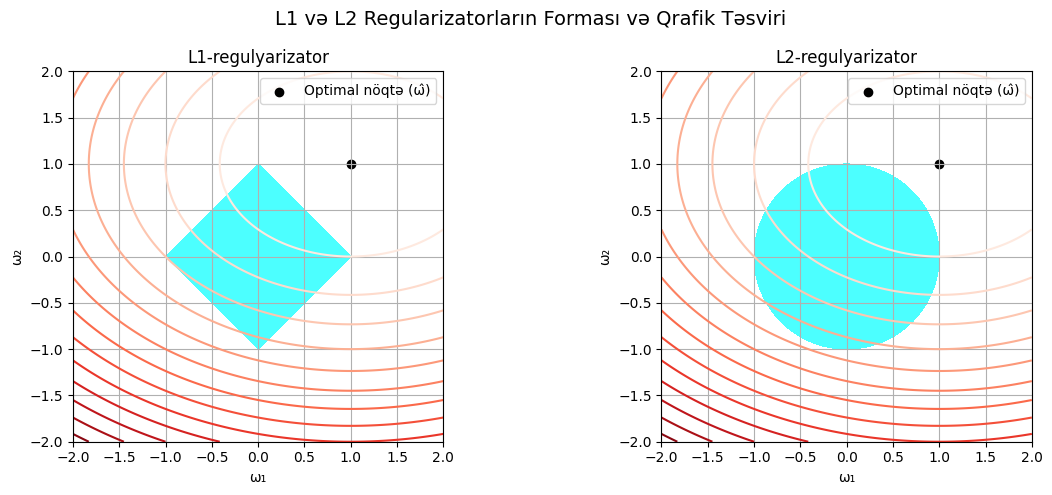

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Grid (şəbəkə) qur
omega1 = np.linspace(-2, 2, 400)
omega2 = np.linspace(-2, 2, 400)
omega1, omega2 = np.meshgrid(omega1, omega2)

# İtki funksiyasının konturları (elips formalı)
loss = (omega1 - 1)**2 + 2*(omega2 - 1)**2  # yönlü elipslərə oxşatmaq üçün fərqli əmsallar

# L1 sərhədi: |w1| + |w2| <= 1 (romb)
l1_region = np.abs(omega1) + np.abs(omega2)

# L2 sərhədi: w1^2 + w2^2 <= 1 (dairə)
l2_region = omega1**2 + omega2**2

# Qrafik qur
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# L1: Romb + Elips
axs[0].contour(omega1, omega2, loss, levels=15, cmap='Reds')
axs[0].contourf(omega1, omega2, l1_region, levels=[0, 1], colors=['cyan'], alpha=0.7)
axs[0].scatter(1, 1, color='black', label='Optimal nöqtə (ω̂)')
axs[0].set_title("L1-regulyarizator")
axs[0].set_xlabel("ω₁")
axs[0].set_ylabel("ω₂")
axs[0].set_aspect('equal')
axs[0].grid(True)
axs[0].legend()

# L2: Dairə + Elips
axs[1].contour(omega1, omega2, loss, levels=15, cmap='Reds')
axs[1].contourf(omega1, omega2, l2_region, levels=[0, 1], colors=['cyan'], alpha=0.7)
axs[1].scatter(1, 1, color='black', label='Optimal nöqtə (ω̂)')
axs[1].set_title("L2-regulyarizator")
axs[1].set_xlabel("ω₁")
axs[1].set_ylabel("ω₂")
axs[1].set_aspect('equal')
axs[1].grid(True)
axs[1].legend()

plt.suptitle("L1 və L2 Regularizatorların Forması və Qrafik Təsviri", fontsize=14)
plt.tight_layout()
plt.show()



Bu şəkil **L1 və L2 regulyarlayıcıların** (regulyarizatorların) təsirini qrafik şəkildə müqayisə edir. Gəlin hissə-hissə və **sadə dildə** izah edək:

---

### 🔶 1. Ümumi Kontekst

Şəkildə iki qrafik var:
- Soldakı: **L1-regulyarizator**
- Sağdakı: **L2-regulyarizator**

Hər iki halda məqsəd — **itki funksiyasını minimum edən** və **çox böyük koeffisiyentlərə (α₁, α₂ və ya w) qarşı cərimə qoyan** bir hədəf funksiyanı optimallaşdırmaqdır.

---

### 🔷 2. Qırmızı Ellipslər – **İtki funksiyasının səviyyə xətləri**  
- Qrafikdəki ellips formalı qırmızı xətlər – **itki funksiyasının eyni dəyəri olan nöqtələrini** göstərir.
- Ortada olan qara nöqtə `ω̂` (və ya $\hat{w}$) – itki funksiyasını minimum edən nöqtədir (regulyarizatorsuz).
  
---

### 🔶 3. Mavi Sahə – **Regulyarizatorun təsir sahəsi**

#### Sol qrafik: L1-regulyarizator (mavi kvadrat)
- Bu regulyarizator **$|w₁| + |w₂| ≤ t$** şəklində bir məhdudiyyət qoyur.
- Bu məhdudiyyət qrafikdə **kvadrat** formasındadır.
- Kvadratın küncləri daha çox ehtimalla **bir çox koeffisiyentin sıfır** olmasına gətirib çıxarır.
  - Ona görə də L1 (Lasso) **sparse** (az koeffisiyent aktiv) modellər yaradır.
- Nəticədə optimal nöqtə tez-tez **oxlar üzərində** (yəni $w_1=0$ və ya $w_2=0$) olur.

#### Sağ qrafik: L2-regulyarizator (mavi dairə)
- Bu isə **$w₁² + w₂² ≤ t$** formasında bir məhdudiyyət qoyur.
- Bu **dairə** (və ya sfera) formasında təsir sahəsidir.
- Optimal nöqtə ümumiyyətlə **orijinə yaxın** olur, amma koeffisiyentlər sıfır olmur.
  - L2 (Ridge) **bütün koeffisiyentləri kiçik edir**, amma sıfırlamaz.

---

### 🔎 4. Kəsişmə nöqtəsi – Həllin tapıldığı yer

- Hər iki qrafikdə **qara ellipslər** və **mavi sahənin** kəsişdiyi nöqtə – regulyarizatorlu halda **ən optimal həll nöqtəsidir**.
- L1-də bu nöqtə çox vaxt **künclərdə** olur → hansısa koeffisiyentlər sıfır olur.
- L2-də isə bu nöqtə **dairənin içində yumşaq şəkildə yerləşir** → bütün koeffisiyentlər qalır, amma kiçilir.

---

### 💡 Sadə Nəticə:
|             | L1 (Lasso)                    | L2 (Ridge)                     |
|-------------|-------------------------------|-------------------------------|
| Şəkil       | Kvadrat (təzyiq sahəsi)       | Dairə (təzyiq sahəsi)         |
| Nəticə      | Koef.lərdən bəzisi = 0        | Hamısı ≠ 0, amma kiçik         |
| Üstünlük    | Seçim (feature selection)     | Overfitting azaldır           |

---

İstəsən bu şəkilə uyğun Python kodla sadə bir L1 və L2 regresiya nümunəsi də qura bilərik. Hazırsansa, deyərsən 💻

---

İstəyirsənsə növbəti addımda `L1` və `L2` regresiyanın Python-da tətbiqini real nümunə ilə göstərə bilərəm. Hazırsansa başlayaq!

## L1-də nəticənin **kvadratın (və ya daha dəqiq desək, rombun) künclərində** yerləşməsinin səbəbi


L1-də nəticənin **kvadratın (və ya daha dəqiq desək, rombun) künclərində** yerləşməsinin səbəbi **geometrik və riyazi təbiətindən** gəlir. Aşağıda **addım-addım və vizual təsəvvürlərlə** izah edim.

---

## ✅ **Niyə L1-də nöqtə çox vaxt küncdə olur?**

### 🔹 1. L1 regulyarizator nədir?

L1 regulyarizator belədir:

$$
\text{Minimize: } \quad \text{Loss}(w) + \lambda \sum |w_i|
$$

Bu, həlli **$|w₁| + |w₂| ≤ t$** məhdudiyyətli sahədə axtarmaq deməkdir.

Bu məhdudiyyət sahəsi **2D vəziyyətdə romb (kvadrat) formasıdır** — bu şəkildə görürsən solda.

---

### 🔹 2. Nə üçün minimum küncdə olur?

Riyazi və vizual səbəb budur:

#### 🔸 İtki funksiyası ellips şəklində olur
İtki funksiyasının kontur xətləri **ellips** formasındadır (bunlar qırmızı xətlərdir).

#### 🔸 L1-də cərimə sahəsi – romb
Bu rombun daxilində ellipslərdən biri ilk dəfə **rombun sərhədinə** toxunduqda, **ən yaxın minimum** tapılmış olur.

#### ✅ Rombun **sərhədlərinin çox hissəsi düz xətlərdir**, amma **künclərdə itki funksiyası ilə daha çox kəsişmə ehtimalı var**.

> Bu künc nöqtələrdən biri çox vaxt **$w₁ = 0$ və ya $w₂ = 0$** olan nöqtədir, yəni **bir çox dəyişənin koeffisiyenti sıfır olur**.

---

### 💡 Bir az riyazi baxışla

L1 cəriməsi **$|w₁| + |w₂|$** kimi kəskin funksiyadır (kənarları "kəskin" dəyişir), ona görə **minimum axtarışı zaman bu kəskin yerlərdə (künclərdə)** durub qalmaq daha ehtimallıdır.

Rəqəmsal optimizasiya üsulları da (məsələn, coordinate descent) bu künclərdə dayanan həllər verir.

---

### 🔎 Müqayisə üçün L2:

L2-də isə cərimə:

$$
w_1^2 + w_2^2 \leq t
$$

Bu dairədir — **kəskin nöqtəsi yoxdur**, hər yer "hamardır", ona görə **minimum heç bir komponenti sıfır etmədən tapılır**.

---

### 📌 Qısaca desək:
| Cəhət | L1 (Lasso) | L2 (Ridge) |
|------|------------|------------|
| Cərimə sahəsi | Kvadrat/romb | Dairə |
| Forması | Küncləri var | Yumşaq |
| Həllin yeri | Tez-tez küncdə (bəzi $w=0$) | Daxildə ($w≠0$) |
| Səbəb | Kəskin dəyişən kontur | Hamarlıq |

---

İstəsən bu effekti `matplotlib` və `contour` ilə Python-da vizuallaşdıraq — daha da aydın olar ✨. İstəyirsənsə, yaz mən qurum.

---

## Python ilə vizuallaşdırmaq

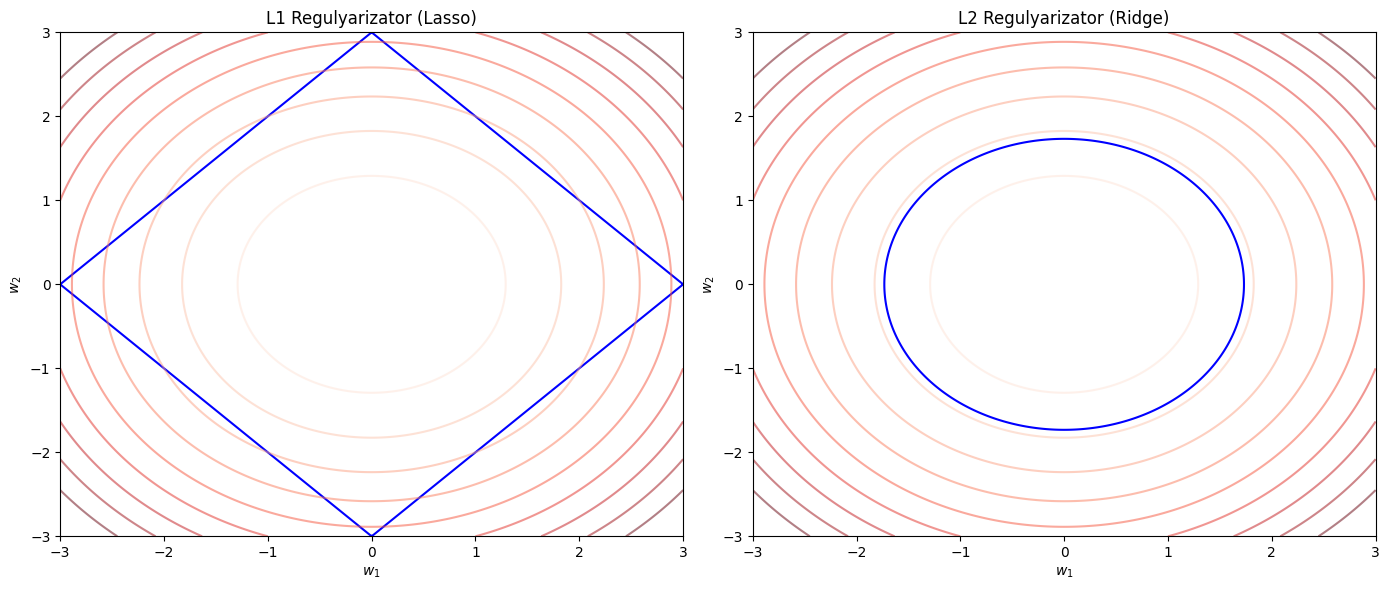

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# İtki funksiyası üçün ellips xətti yaratmaq
def loss_function(w1, w2):
    return w1**2 + w2**2  # Sadə kvadrat itki funksiyası (məsələn, MSE)

# L1 və L2 regulyarizatorlarının təsiri
def l1_constraint(w1, w2, t):
    return np.abs(w1) + np.abs(w2) - t

def l2_constraint(w1, w2, t):
    return w1**2 + w2**2 - t

# Şəbəkənin ölçüləri
w1_vals = np.linspace(-3, 3, 400)
w2_vals = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Cərimə sahələrini hesablamaq
l1_vals = l1_constraint(W1, W2, 3)
l2_vals = l2_constraint(W1, W2, 3)

# Itki funksiyasını hesablamaq
loss_vals = loss_function(W1, W2)

# Qrafiklər
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# L1-regulyarizatoru (kvadrat sahə)
c1 = axs[0].contour(W1, W2, l1_vals, levels=[0], colors='blue')
axs[0].set_title('L1 Regulyarizator (Lasso)')
axs[0].set_xlabel('$w_1$')
axs[0].set_ylabel('$w_2$')
axs[0].contour(W1, W2, loss_vals, levels=np.linspace(0, 15, 10), cmap='Reds', alpha=0.5)

# L2-regulyarizatoru (dairə sahə)
c2 = axs[1].contour(W1, W2, l2_vals, levels=[0], colors='blue')
axs[1].set_title('L2 Regulyarizator (Ridge)')
axs[1].set_xlabel('$w_1$')
axs[1].set_ylabel('$w_2$')
axs[1].contour(W1, W2, loss_vals, levels=np.linspace(0, 15, 10), cmap='Reds', alpha=0.5)

plt.tight_layout()
plt.show()

## Ümumiləşdrimə və 3 Mühüm suala cavab



### **1) Niyə L1 və L2-də `|w|` və ya `w²` Gradient-ə gələndə bəzi əmsallar kiçilir və ya 0 olur?**

**Cavab:**

**L1 (Lasso) və L2 (Ridge)** normallaşdırma üsullarında məqsəd modelin kompleksliyini azaldıb overfitting-dən qorumaqdır. Onlar `loss` funksiyasına cərimə (penalty) əlavə edirlər:

- **L2 (Ridge):** `Loss + λ * ∑w²`  
  Bu üsulda cərimə `$w²$` formasında olduğu üçün, böyük əmsallar daha çox cərimə alır və gradientlə yenilənərkən daha çox azaldılır. Amma əmsalları **0 etməyə meyilli deyil**, sadəcə **kiçildir**.


- **L1 (Lasso):** `Loss + λ * ∑|w|`  
  Burada `|w|` istifadə olunur, ona görə də bəzi gradientlər ya tam 0 olur, ya da dəyişmədən qalır. Bu isə bəzi `$w$`-lərin **tam 0** olmasına gətirib çıxarır.  
  ⚠️ **Feature selection** effekti verir: yəni vacib olmayan dəyişənləri sıradan çıxarır.

---

### **2) Hər ikisi xətti asılılıq (multicollinearity) problemini həll edir?**
  
**Cavab:**

- **L2 (Ridge):** ✔️ Bəli.  
  L2 cəriməsi `X'X` matrisinin determinantı sıfıra yaxın olsa belə, `λI` əlavə olunduğu üçün onu invert etmək (ters matrisini almaq) **mümkün olur**. Beləcə, xətti asılılıq problemi **çox gözəl şəkildə həll olunur**.

- **L1 (Lasso):** ⚠️ Bəli, amma fərqli yolla.  
  L1 sadəcə **bəzi dəyişənləri sıfıra çevirərək** problemi aradan qaldırır. Yəni redundant və ya bir-birinə çox oxşar olan dəyişənlərdən bəzilərini **tamamilə silir**. Ancaq **ters matrislə birbaşa işi yoxdur.**

---

### **3) Nə vaxt L1, nə vaxt L2 istifadə etməliyəm? Dataya baxıb necə müəyyən edim?**

**Cavab:**

| Şərt | Hansı daha uyğundur? |
|------|-----------------------|
| **Çox sayda dəyişən var, amma az sayda faydalıdır** | ➤ **L1 (Lasso)** – Feature Selection edir, bəzi əmsallar 0 olur |
| **Dəyişənlər bir-birinə çox bənzəyir (multicollinearity var)** | ➤ **L2 (Ridge)** – Bütün əmsalları azaldır, amma heç birini 0 etmir |
| **Nə əminsən, həm feature selection, həm də regularization istəyirsən** | ➤ **ElasticNet** – L1 və L2-nin qarışığıdır |

#### Dataya baxıb necə müəyyən etməli?

> - **Dəyişənlərin sayı çoxdursa və onların arasında çoxu lazımsız görünürsə** ➤ L1.  
> - **Dəyişənlərin sayı azdır, amma bir-birinə çox bağlıdırsa** ➤ L2.  
> - **Modeldə overfitting hiss edirsənsə və stabil modelləşdirmə istəyirsənsə** ➤ Hər ikisi uyğundur, amma L2 daha stabildir.

## L1 və L2 niyə çəki əmsallarını azaltsın?

 
Gəlin **“niyə model çəki əmsallarını azaltsın?”** sualına **nəzəri və intuitiv** cavab verək. Yəni, **model niyə w-ni azaldır?**

---

## 🎯 Məqsəd nədir?
Modelin məqsədi **Total Loss**-u minimuma endirməkdir:

$$
\text{Total Loss}(w) = \text{Loss}(w) + \frac{\lambda}{2} \cdot w^2
$$

Burada:
- **Loss(w)** = orijinal zərər funksiyası (məsələn, MSE)
- **λ/2 · w²** = cərimə (penalty), bu sənin dediyin **Ridge (L2)** cəriməsidir.

---

## 🧠 Bəs indi model nə “fikir”ləşir?

Deyək ki model bir təlim nümunəsinə baxır və belə düşünür:
- Əgər mən **w** parametrini **böyük** saxlasam:
  - Bəli, ola bilər ki, bu nümunəyə çox **dəqiq uyğunlaşım** (low Loss(w))
  - Amma **penalty = w²** də **çox böyük olacaq** → **Total Loss** artacaq

---

### ⚖️ Trade-off (Tarazlıq)
Model hər dəfə `w`-ni dəyişəndə aşağıdakı iki şeyə baxır:

| Əgər w-ni artırsa | Əgər w-ni azaltsa |
|------------------|------------------|
| ✅ MSE azalır (Loss(w) ↓) | ❌ MSE bir az arta bilər |
| ❌ Cərimə çoxalır (w² ↑) | ✅ Cərimə azalır (w² ↓) |

> 🔄 Model bu tarazlığı saxlayır: **dəqiq olmağa çalışır**, amma **çəki parametrlərini böyütməkdən çəkinir**.

---

## ❓ Niyə çəkinir?

Çünki **overfitting** (həddən artıq uyğunlaşma) riski var. Əgər çəkilər (w) çox böyüsə:
- Model təlim datasına **çox yaxşı uyğunlaşacaq**
- Amma **test datasında bərbad performans göstərə bilər**

---

## 🧪 Riyazi olaraq:

Gradient descent zamanı belə bir şey olur:
$$
w = w - \eta \cdot \frac{d}{dw} \left(\text{Loss}(w) + \frac{\lambda}{2} w^2 \right)
$$
$$
\Rightarrow w = w - \eta \cdot \left( \frac{d}{dw} \text{Loss}(w) + \lambda w \right)
$$

Görürsən?  
- **λw** termininə görə **gradientdə əlavə azaldıcı təsir var**  
- Yəni **həmişə bir az w-nin üstünə "azaldıcı qüvvə" gəlir**

---

## 🔚 Nəticə:
Model **emsalları azaltmaqla**:
- Daha **sadə model** qurur  
- **Overfitting**-dən qorunur  
- **Total loss**-u daha aşağıda saxlayır  
- Çünki **w² böyüdükcə Total Loss da artır**

---

İstəyirsənsə, bir mini nümunə ilə `Loss(w)` + `λw²` funksiyasının qrafikini çəkək, gör nə zaman minimum olur. Vizual baxış bu ideyanı çox aydın göstərir. Demək istəsən, dərhal çəkək.

## Məsələni başa düşmək üçün gəlin bu nümunəyə baxaq



Deyək ki modelimiz çox sadədir:  
$$  
y = w \cdot x  
$$

və bizim təlim datamız belədir:  
- $x = 2$, $y = 10$

---

### 1. **Əgər $w = 4$** seçsəm:  
$$  
\hat{y} = 2 \cdot 4 = 8 \quad \Rightarrow \quad \text{MSE} = (10 - 8)^2 = 4  
$$ 

$$  
\text{Penalty} = \lambda w^2 = \lambda \cdot 16  
$$

---

### 2. **Əgər $w = 5$** seçsəm:  
$$  
\hat{y} = 2 \cdot 5 = 10 \quad \Rightarrow \quad \text{MSE} = (10 - 10)^2 = 0  
$$  

$$  
\text{Penalty} = \lambda w^2 = \lambda \cdot 25  
$$

---

## 📊 İndi müqayisə et:

| w  | MSE  | Penalty ($\lambda w^2$) | Total Loss       |
|----|------|--------------------------|------------------|
| 4  | 4    | $16\lambda$              | $4 + 16\lambda$  |
| 5  | 0    | $25\lambda$              | $25\lambda$      |

Buradan nə çıxır?

> Əgər **$\lambda$ çox kiçikdirsə** (məsələn 0.01), model **MSE-ni sıfıra endirmək üçün $w$-ni artırmağa hazırdır**, çünki cərimə çox təsir etmir.  
> Əgər **$\lambda$ böyükdürsə** (məsələn 10), onda model deyir: “yox, mən MSE-ni sıfır etsəm də, cərimə çox böyüyəcək — **$w$-ni çox böyütməyə dəyməz**.”

---

## ✅ Cavab:

Bəli, **$w$-ni artırsa, cərimə artır** – bu doğrudur.

Amma bəzən **$w$-ni artırmaqla MSE-ni (yəni loss hissəsini) azalda bilər**.  
Model **bu iki tərəziyə baxır** və **Total Loss**-u azalda biləcəksə artırır, yoxsa azaldır.

---

## 🎯 Ona görə də deyirik:

| w artırsa | nə baş verir? |
|-------------|----------------|
| ✅ MSE azalır (dəqiqlik artır) |
| ❌ Amma penalty artır ($w^2$ çoxalır) |

və bu **trade-off**-dur.

---

İndi qrafiklə göstərsəm, daha da intuitiv olar. Vizual görmək istəyirsənsə, xəbər et 💡

##  Niyə L2 cəriməsi ( $w^2$ ) sadəcə əmsalı azaldır, amma L1 cəriməsi ( $|w|$ ) onu çox vaxt sıfıra qədər aparır?



## ⚖️ 1. Cərimə funksiyalarının fərqi

| Cərimə növü | Formula         | Qrafikin forması         | Təsiri |
|-------------|------------------|---------------------------|--------|
| **L2**      | $ \lambda w^2 $ | Parabola (smooth)         | w-ni **azaldır**, sıfıra yaxınlaşdırır, amma tam sıfır etməyə çalışmır. |
| **L1**      | $ \lambda \lvert w \lvert $  | V şəkilli (nonsmooth)     | w-ni **birbaşa sıfıra** çəkməyə meyllidir. **Sparsity** yaradır. |

---

## 🧠 2. Gradient fərqi

Model **gradient descent** ilə çəkiləri azaldır. Gəlin gradient-lərə baxaq:

### L2:
$$
\frac{d}{dw}(w^2) = 2w
$$

- w nə qədər böyükdürsə, azaldıcı təsir də o qədər böyükdür  
- Amma w sıfıra yaxınlaşdıqca, bu **gradient də kiçilir** → azaldıcı güc **yavaşlayır**

Yəni:  
> **Model w-ni sıfıra yaxınlaşdırır, amma sıfır etməyə "mecbur" deyil**

---

### L1:
$$
\frac{d}{dw}(|w|) = 
\begin{cases}
1, & w > 0 \\
-1, & w < 0 \\
\text{undefined}, & w = 0
\end{cases}
$$

- Burda **gradient sabitdir!**: w böyük olsa da, kiçik olsa da, fərq etmir – **modelə təzyiq daimidir**  
- Bu o deməkdir ki, model **kiçik çəkiləri sıfıra qədər itələyir** (hard push)


> Yəni L1 modeli **sıfıra getməyə məcbur edir**, L2 isə sadəcə "yaxınlaş" deyir.


---

## 🧲 3. Geometrik intuisiya (ən gözəl hissə!)

- L2 cəriməsi çəkilər üçün **dairəvi** sərhəd yaradır → nəticə: çəkilər azalır, amma çox vaxt sıfır olmur
- L1 cəriməsi **romb** formalı sərhəd yaradır → künclərdə çox zaman w = 0 olur → **sparsity** (seçici model)

[L1 vs L2 geometrik](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/L1_vs_L2_regularization.svg/500px-L1_vs_L2_regularization.svg.png)

Görsən: L1-də optimal nöqtə çox zaman **oxlarla kəsişir** → hansısa **w = 0** olur  
L2-də isə optimal nöqtə çox zaman sıfır **olmayan** nöqtədir.

---

## 🎯 Yekun:
| Cəhət | L2 (w²) | L1 ($\lvert w \lvert$) |
|------|---------|---------|
| Gradient | $2w$ (kiçik w üçün zəif) | ±1 (daim sabit) |
| Nəticə | w-ni sadəcə **kiçildir** | w-ni çox zaman **sıfır** edir |
| Effekt | Smooth | Sparsity (seçim edir) |
| Modelə təsiri | Daha sabit | Feature selection effekti |

---

Əgər istəsən `w = np.linspace(-3,3,100)` üçün bu iki cərimənin qrafikini çəkə bilərik – vizual olaraq fərq **dərhal görünür**.

Hazıram çəkməyə, sadəcə "bəli" de 😎

## Yekun Ümumiləşdirmə (1)

## Xətti asılılıq və Overfitting: L1 və L2 baxışı

### **1. L1 Regularization (Lasso)**
---

#### **Niyə xətti asılılıq overfitting yaradır?**
>- Multicollinearity olduqda, model **hansı feature-in əslində vacib olduğunu müəyyən edə bilmir**, çünki eyni məlumatı bir neçə dəyişən daşıyır.
>- Bu, modelin **çox parametr öyrənməsinə**, bəzən isə **faydasız və ya redundant** feature-ların da daxil edilməsinə səbəb olur.
>- Nəticədə model train datasını əla öyrənir, amma test datasında **generalizasiya zəifləyir** → overfitting.

#### **L1 necə həll edir?**
- L1 (Lasso) regularization **modelin loss funksiyasına əlavə cəza (penalty) əlavə edir**:  
  $$ Loss = MSE + \alpha \cdot \lvert \lvert \beta \lvert \lvert_1 $$
  - Burada $ \lvert \lvert \beta \lvert \lvert_1$ bütün koeffisentlərin **modulunun cəmi**dir (L1 norması).
- Bu cəza prinsipi modelə "mümkün qədər az sayda koeffisent seç" mesajı verir.
- Nəticə:
  - Əmsalların bəziləri **tam sıfıra** çevrilir (çünki sıfır olmaq cəzanı azaldır).
  - Bu, redundant (təkrarlayan və ya təsirsiz) feature-ların **modeldən çıxarılmasına** səbəb olur.
  - Sadə və daha şərh edilə bilən model yaranır.
  - Multicollinearity azalır, overfitting riski də azalır.

#### **Yekun fikir (L1):**
- L1 regularization **cəza prinsipinə əsasən** əmsalları sıfıra endirir.
- Bu, həm loss funksiyasına təsir edir, həm də modelin **sparse (seçici)** olmasına səbəb olur.
- L1 multicollinearity ilə bağlı **feature selection** effekti yaradır: eyni informasiyanı daşıyan feature-lardan yalnız birini saxlayır, digərlərini sıfıra çevirir.

---

### **2. L2 Regularization (Ridge)**
---

#### **Niyə xətti asılılıq overfitting yaradır?**
>- Güclü xətti asılılıq zamanı, bəzi feature-ların **koeffisentləri çox böyük olur**, amma əslində bu dəyişənlərin müstəqil təsiri yoxdur.
>- Bu böyük dəyərlər modelin test datasında **dəyişkənliyini artırır**, yəni proqnozlar qeyri-sabit olur → overfitting.

#### **Xətti asılılıq və ters matris problemi**
- Xətti regresiya modelində $ \beta = (X^TX)^{-1} X^Ty $ düsturundan istifadə olunur.
- Əgər **$X^TX$ matrisində xətti asılılıq varsa**, bu matris **singular** olur və **inversi (tersi) mümkün olmur** və ya olduqca qeyri-sabit olur.
- Bu zaman **regression koeffisentlərini hesablamaq qeyri-sabit** və ya mümkün olmaya bilər.

#### **L2 necə həll edir?**
- L2 (Ridge) regularization da **loss funksiyasına cəza termini əlavə edir**:  
  $$ Loss = MSE + \alpha \cdot \lvert \lvert \beta \lvert \lvert_2^2 $$
  - Burada $ \lvert \lvert \beta \lvert \lvert_2^2$ bütün koeffisentlərin **kvadratlarının cəmi**dir (L2 norması).
- Bu cəza prinsipi:
  - Bütün əmsalları **kiçiltməyə çalışır**, amma heç birini sıfıra endirmir.
  - Əmsallar arasında **balanslı bölünmə** yaradır və çox böyük əmsalları cəzalandırır.
- Eyni zamanda, Ridge modelində **ters matris problemini də həll edir**:
  - Ridge-də istifadə olunan düstur:  
    $$ \beta = (X^TX + \alpha I)^{-1} X^Ty $$
  - Buradakı $ \alpha I $ matrisə **sabitlik** verir və onun **inversini mümkün və stabil edir**.

#### **Yekun fikir (L2):**
- L2 regularization həm **loss funksiyasına təsir edir**, həm də **cəza prinsipinə əsaslanaraq** koeffisentləri kiçildir.
- Bu sayədə:
  - Əmsallar çox böyük olmur (yəni dəyişkənlik azalır),
  - Ters matris problemi riyazi olaraq həll olunur,
  - Model daha **stabil** və **generalizable** olur.
- Lakin, L2 koeffisentləri sıfıra çevirmir – sadəcə onları **yumşaldır və balanslaşdırır**.

---

## **Qısa müqayisə: L1 vs L2 qarşı xətti asılılıq**

| Aspekt | L1 (Lasso) | L2 (Ridge) |
|--------|------------|------------|
| Xətti asılılıqla necə mübarizə aparır? | Redundant feature-ları sıfıra endirərək çıxarır | Koefisentləri kiçildir, amma saxlayır |
| Ters matris problemi | Həll etmir | $+\alpha I$ əlavə etməklə inversibilik yaradır |
| Cəza prinsipi | $ \lvert \lvert \beta \lvert \lvert_1$ norması ilə bəzi əmsalları sıfıra endirir | $ \lvert \lvert \beta \lvert \lvert_2^2$ norması ilə əmsalları yumşaldır |
| Loss funksiyasına təsiri | Loss + L1 cəzası | Loss + L2 cəzası |
| Modelə təsiri | Daha sadə, daha az feature | Daha stabil, bütün feature-ları saxlayır |
| Overfitting riskini necə azaldır? | Lazımsız dəyişənləri silərək | Koefisentləri balanslaşdıraraq |

---

İndi istəyirsənsə, sadə bir Python kodu ilə bu prinsipləri vizual şəkildə göstərək. Həm `Lasso` modelində bəzi əmsalların sıfırlandığını, həm də `Ridge` modelində necə yumşaldığını göstərə bilərik. Deyirsən keçək ona?

## Yekun Ümumiləşdirmə (2)

## L1 və L2 – sadəcə tərs matris məsələsi deyil

### **L1 və L2 regularization yalnız riyazi stabillik (məsələn, ters matris problemi) üçün deyil**, həm də **modelin itki funksiyasını (loss function) balanslaşdırmaq üçün istifadə olunur.**

---

## **L1 (Lasso) – necə işləyir?**
- L1 cəriməsində istifadə olunan **loss funksiyası belə olur**:

  $$Loss = MSE + \alpha \times \lvert \lvert \beta \lvert \lvert_1$$

  yəni:

  $$Loss = (hata)^2 + \alpha \times (\lvert \lvert \beta_1 | + \lvert \lvert \beta_2 \lvert \lvert + ... + \lvert \lvert \beta_n \lvert \lvert)$$

>- Model əgər hiss edir ki, **bir feature-in əmsalını sıfır etsə, ümumi loss azalmır**, amma **cərimə azalır**, o zaman **əmsalı sıfıra endirir**.
- Beləliklə:
>- **Əgər bir feature model üçün vacib deyilsə**, L1 onu sıfırlayaraq **modeldən çıxarır**.
>- Bu, həm loss-un sabit qalması, həm də cərimənin azalması ilə mümkündür.

---

## **L2 (Ridge) – necə işləyir?**
- L2 cəriməsində isə:

  $$Loss = MSE + \alpha \times \lvert \lvert \beta \lvert \lvert_2^2$$

  yəni:

  $$Loss = (hata)^2 + \alpha \times (\beta_1^2 + \beta_2^2 + ... + \beta_n^2)$$

>- L2, L1 kimi əmsalları sıfıra gətirmir, amma **onların çox böyüməsinə icazə vermir**.
>- Əgər bir əmsal çox böyüsə, **cərimə də kvadrat olaraq böyüyür**, bu da ümumi loss-u artırır.
- Model baxır: 
>- **Əgər loss (yəni MSE) çox dəyişmirsə**, amma **cərimə böyüyürsə**, o zaman **əmsalı azaldır**.
>- Bu **loss ilə cərimə arasında tarazlıqdır** → ona görə L2 **bütün əmsalları yumşaldır, amma sıfıra gətirmir.**

---

## **Ters matris məsələsi: Sadəcə bonusdur**
>- Ridge regresiyanın $(X^TX + \alpha I)^{-1}$ formulu **tətbiqi (computational) stabillik üçündür**.
>- Amma **əsas məqsəd yenə də loss və cərimənin balansıdır**.

---

## **Yekun cavab:**
| Sual | Cavab |
|------|-------|
| L1 və L2 sadəcə ters matris üçünmü var? | **Xeyr**, əsas məqsəd **overfitting qarşı balanslı loss minimizasiyasıdır** |
| L1 necə sıfıra gətirir? | **Əgər loss artmadan cərimə azalırsa, əmsalı sıfır edir** |
| L2 necə dəyişir? | **Əmsalları yumşaldır**, çünki böyüsə cərimə də kvadrat olaraq böyüyür |
| Ters matris problemi nə üçündür? | **Riyazi stabillik üçündür**, xüsusilə L2-də, amma əsas məqsəd deyil |

---

İndi tam istədiyin formatdadır. Əgər əlavə düzəlişlər və ya vizual izahlar da istəsən, məmnuniyyətlə edərəm.

## L1 Regularization. L1 ve L2 Regularization arasında fərqlər

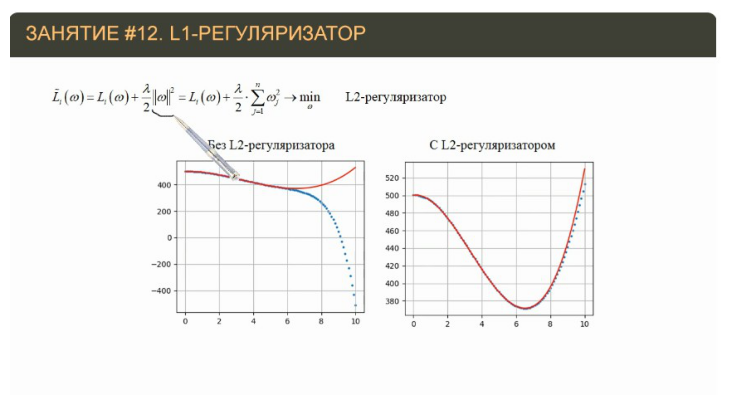

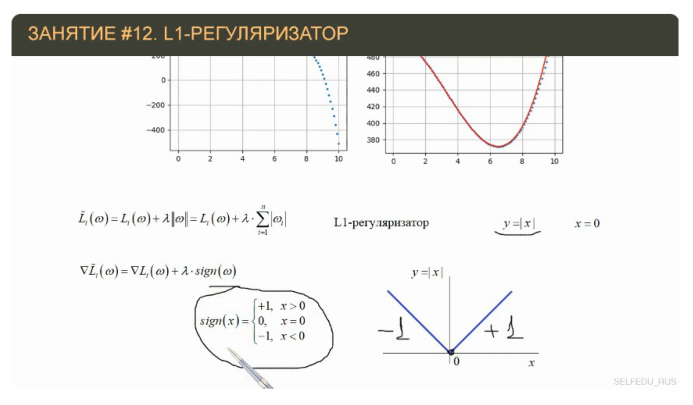

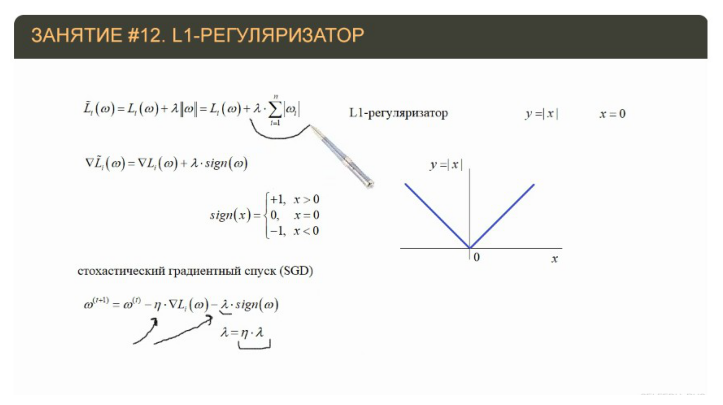

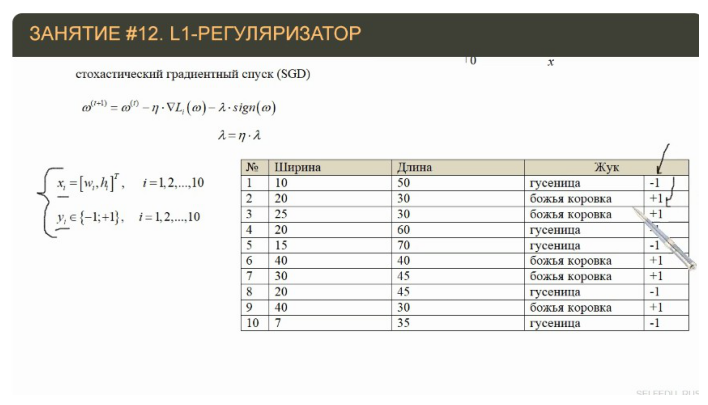

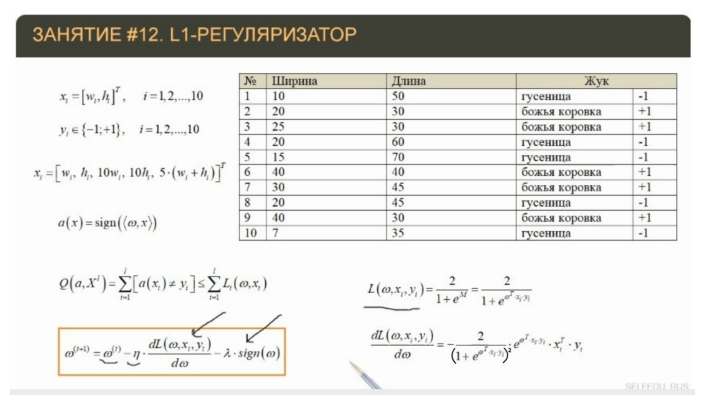

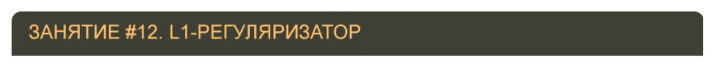

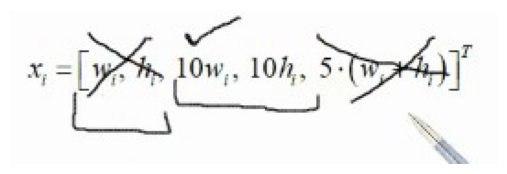

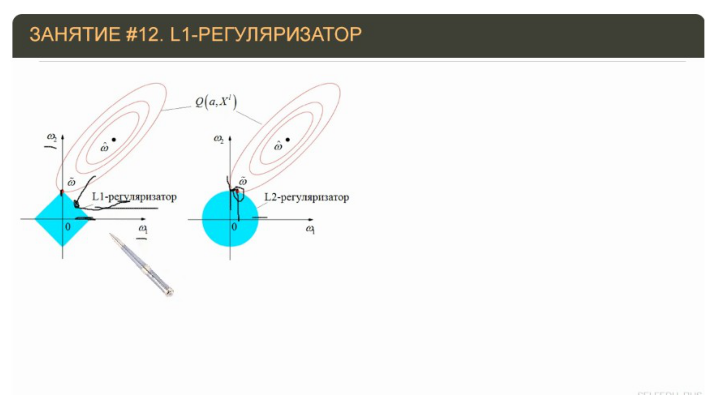

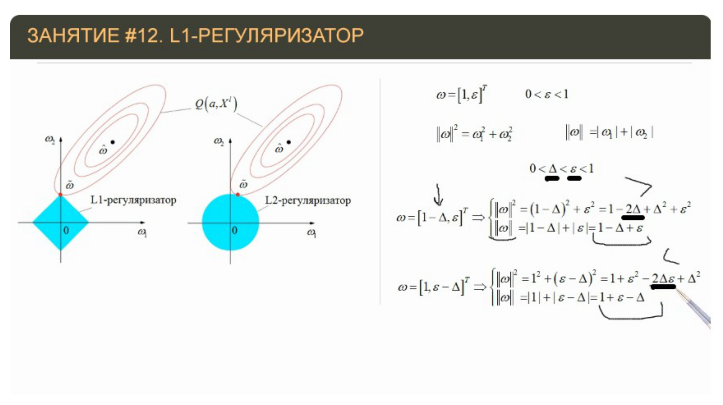

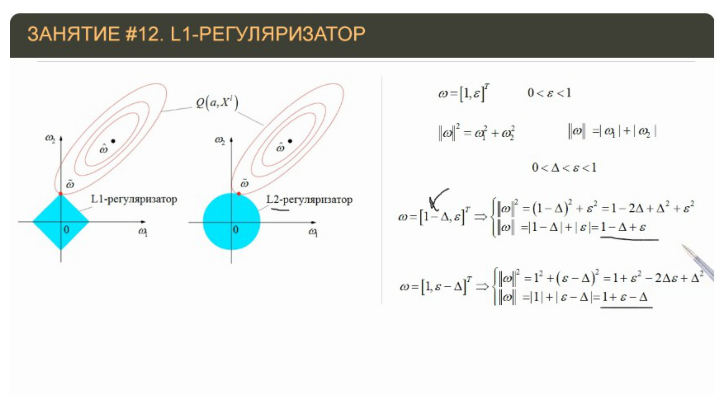

In [167]:
from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Pictures\L1_Regul_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 11):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for i, image in enumerate(image_list):
    if i == 5:
        plt.figure(figsize=(9, 0.8))
    elif i == 6:
        plt.figure(figsize=(17.5, 2))
    else:    
        plt.figure(figsize=(20, 5))  # Şəkilin ölçüsü
    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show()

## L1 Regularization ilə  ($ + | \lambda w|$ və ya  $ \lambda sign(w) $)

w: [ 0.000002  0.00002   0.063529 -0.034173  0.000038]
Q: 0.03452340421905586


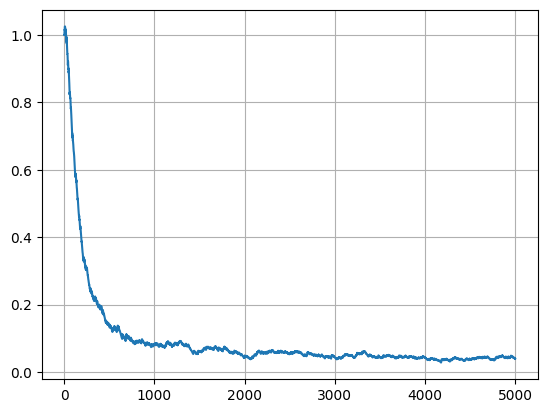

In [42]:
# NumPy kitabxanasını massivlər və riyazi əməliyyatlar üçün idxal edirik
import numpy as np
# Matplotlib kitabxanasından qrafik çəkmək üçün pyplot modulunu idxal edirik
import matplotlib.pyplot as plt
#  Rəqəmləri Elmi notasiya olmadan, sadə formatda göstər
np.set_printoptions(suppress=True, precision=6)


# Sigmoid əsaslı loss (itki) funksiyası təyin edilir
def loss(w, x, y):
    # M — xətti modelin çıxışı ilə y-ni vururuq
    M = np.dot(w, x) * y
    # Sigmoid funksiyası əsasında itki hesablanır
    return 2 / (1 + np.exp(M))

# Sigmoid əsaslı loss funksiyasının çəkilər (w) üzrə törəməsi
def df(w, x, y):
    # L1 cərimə əmsalı (regularization constant)
    L1 = 1.0
    # M yenə model çıxışı ilə y-nin hasilidir
    M = np.dot(w, x) * y
    # Törəmə sigmoid funksiyası üzrə hesablanır və L1 regularizasiya əlavə edilir
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Təlim üçün nümunələr (x_train) — 2 xüsusiyyətlə verilmişdir
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# Hər nümunəyə əlavə olaraq 3 süni xüsusiyyət əlavə edilir (çoxluq səviyyəsində transformasiyalar)
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
# x_train siyahısı NumPy massivinə çevrilir
x_train = np.array(x_train)
# Yəni çıxış dəyərləri (etiketlər) +1 və -1 kimi verilir
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Xüsusiyyətlərin sayı (yəni çəkilərin sayı)
fn = len(x_train[0])
# Təlim nümunələrinin sayı
n_train = len(x_train)
# Çəkilərin başlanğıc qiyməti (sıfırdan başlanır)
w = np.zeros(fn)
# Stoxastik Qradyent Descent üçün öyrənmə sürəti (learning rate)
nt = 0.00001
# Keyfiyyət göstəricisinin (Q) hesablanmasında "keçmişi unutma" əmsalı (lambda)
lm = 0.01
# SGD üçün ümumi iterasiya sayı
N = 5000

# Başlanğıcda modelin orta itkisi (empirik risk)
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])
# Təlim müddətində itki dəyərlərinin izlənməsi üçün siyahı
Q_plot = [Q]

# SGD ilə təlim dövrü
for i in range(N):
    # Təlim dəstindən təsadüfi indeks seçilir
    k = np.random.randint(0, n_train - 1)
    # Seçilmiş nümunə üzrə itki hesablanır
    ek = loss(w, x_train[k], y_train[k])
    # Çəkilər SGD qaydasına əsasən yenilənir
    w = w - nt * df(w, x_train[k], y_train[k])
    # Keyfiyyət göstəricisi (Q) yeni itki ilə yenilənir
    Q = lm * ek + (1 - lm) * Q
    # Q dəyəri qrafik üçün siyahıya əlavə edilir
    Q_plot.append(Q)

# Təlimdən sonra modelin orta empirik riski yenidən hesablanır
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])

# Əldə olunan çəkilər çap olunur
print(f'w: {w}')
# Son empirik risk dəyəri çap olunur
print(f'Q: {Q}')

# Təlim müddətində Q dəyərlərinin dəyişimini vizuallaşdırırıq
plt.plot(Q_plot)
# Qrafikdə şəbəkə xətləri göstərilir
plt.grid(True)
# Qrafik göstərilir
plt.show()

## L1 Regularization olmadan

w: [0.001101 0.000975 0.011014 0.009754 0.010384]
Q: 0.9997659879980925


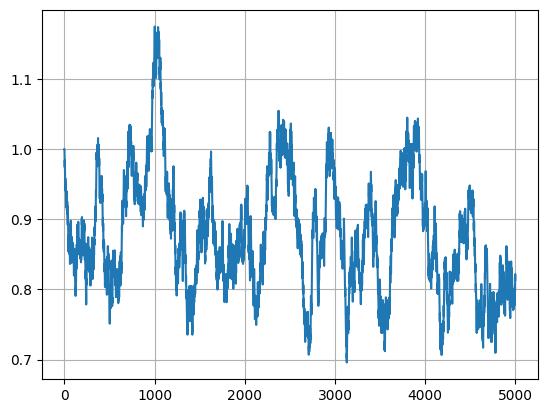

In [93]:
# NumPy kitabxanasını massivlər və riyazi əməliyyatlar üçün idxal edirik
import numpy as np
# Matplotlib kitabxanasından qrafik çəkmək üçün pyplot modulunu idxal edirik
import matplotlib.pyplot as plt
#  Rəqəmləri Elmi notasiya olmadan, sadə formatda göstər
np.set_printoptions(suppress=True, precision=6)


# Sigmoid əsaslı loss (itki) funksiyası təyin edilir
def loss(w, x, y):
    # M — xətti modelin çıxışı ilə y-ni vururuq
    M = np.dot(w, x) * y
    # Sigmoid funksiyası əsasında itki hesablanır
    return 2 / (1 + np.exp(M))

# Sigmoid əsaslı loss funksiyasının çəkilər (w) üzrə törəməsi
def df(w, x, y):
    # L1 cərimə əmsalı (regularization constant)
    L1 = 0
    # M yenə model çıxışı ilə y-nin hasilidir
    M = np.dot(w, x) * y
    # Törəmə sigmoid funksiyası üzrə hesablanır və L1 regularizasiya əlavə edilir
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Təlim üçün nümunələr (x_train) — 2 xüsusiyyətlə verilmişdir
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# Hər nümunəyə əlavə olaraq 3 süni xüsusiyyət əlavə edilir (çoxluq səviyyəsində transformasiyalar)
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
# x_train siyahısı NumPy massivinə çevrilir
x_train = np.array(x_train)
# Yəni çıxış dəyərləri (etiketlər) +1 və -1 kimi verilir
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Xüsusiyyətlərin sayı (yəni çəkilərin sayı)
fn = len(x_train[0])
# Təlim nümunələrinin sayı
n_train = len(x_train)
# Çəkilərin başlanğıc qiyməti (sıfırdan başlanır)
w = np.zeros(fn)
# Stoxastik Qradyent Descent üçün öyrənmə sürəti (learning rate)
nt = 0.00001
# Keyfiyyət göstəricisinin (Q) hesablanmasında "keçmişi unutma" əmsalı (lambda)
lm = 0.01
# SGD üçün ümumi iterasiya sayı
N = 5000

# Başlanğıcda modelin orta itkisi (empirik risk)
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])
# Təlim müddətində itki dəyərlərinin izlənməsi üçün siyahı
Q_plot = [Q]

# SGD ilə təlim dövrü
for i in range(N):
    # Təlim dəstindən təsadüfi indeks seçilir
    k = np.random.randint(0, n_train - 1)
    # Seçilmiş nümunə üzrə itki hesablanır
    ek = loss(w, x_train[k], y_train[k])
    # Çəkilər SGD qaydasına əsasən yenilənir
    w = w - nt * df(w, x_train[k], y_train[k])
    # Keyfiyyət göstəricisi (Q) yeni itki ilə yenilənir
    Q = lm * ek + (1 - lm) * Q
    # Q dəyəri qrafik üçün siyahıya əlavə edilir
    Q_plot.append(Q)

# Təlimdən sonra modelin orta empirik riski yenidən hesablanır
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])

# Əldə olunan çəkilər çap olunur
print(f'w: {w}')
# Son empirik risk dəyəri çap olunur
print(f'Q: {Q}')

# Təlim müddətində Q dəyərlərinin dəyişimini vizuallaşdırırıq
plt.plot(Q_plot)
# Qrafikdə şəbəkə xətləri göstərilir
plt.grid(True)
# Qrafik göstərilir
plt.show()

## L2 Regularization ilə ($ + \lambda w$)  

w: [0.001214 0.000764 0.012141 0.007645 0.009893]
Q: 0.9994137962997096


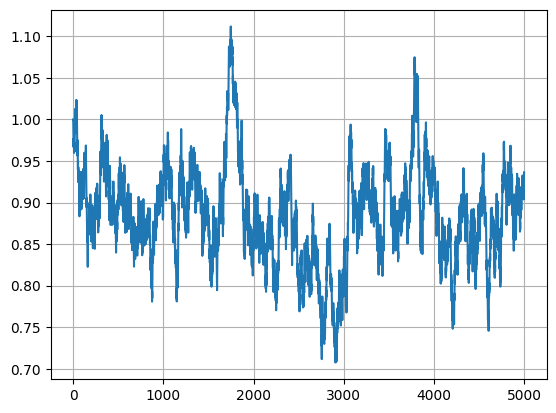

In [107]:
# NumPy kitabxanasını massivlər və riyazi əməliyyatlar üçün idxal edirik
import numpy as np
# Matplotlib kitabxanasından qrafik çəkmək üçün pyplot modulunu idxal edirik
import matplotlib.pyplot as plt
#  Rəqəmləri Elmi notasiya olmadan, sadə formatda göstər
np.set_printoptions(suppress=True, precision=6)


# Sigmoid əsaslı loss (itki) funksiyası təyin edilir
def loss(w, x, y):
    # M — xətti modelin çıxışı ilə y-ni vururuq
    M = np.dot(w, x) * y
    # Sigmoid funksiyası əsasında itki hesablanır
    return 2 / (1 + np.exp(M))

# Sigmoid əsaslı loss funksiyasının çəkilər (w) üzrə törəməsi
def df(w, x, y):
    # L1 cərimə əmsalı (regularization constant)
    L1 = 1.0
    # M yenə model çıxışı ilə y-nin hasilidir
    M = np.dot(w, x) * y
    # Törəmə sigmoid funksiyası üzrə hesablanır və L1 regularizasiya əlavə edilir
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * w

# Təlim üçün nümunələr (x_train) — 2 xüsusiyyətlə verilmişdir
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# Hər nümunəyə əlavə olaraq 3 süni xüsusiyyət əlavə edilir (çoxluq səviyyəsində transformasiyalar)
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
# x_train siyahısı NumPy massivinə çevrilir
x_train = np.array(x_train)
# Yəni çıxış dəyərləri (etiketlər) +1 və -1 kimi verilir
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Xüsusiyyətlərin sayı (yəni çəkilərin sayı)
fn = len(x_train[0])
# Təlim nümunələrinin sayı
n_train = len(x_train)
# Çəkilərin başlanğıc qiyməti (sıfırdan başlanır)
w = np.zeros(fn)
# Stoxastik Qradyent Descent üçün öyrənmə sürəti (learning rate)
nt = 0.00001
# Keyfiyyət göstəricisinin (Q) hesablanmasında "keçmişi unutma" əmsalı (lambda)
lm = 0.01
# SGD üçün ümumi iterasiya sayı
N = 5000

# Başlanğıcda modelin orta itkisi (empirik risk)
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])
# Təlim müddətində itki dəyərlərinin izlənməsi üçün siyahı
Q_plot = [Q]

# SGD ilə təlim dövrü
for i in range(N):
    # Təlim dəstindən təsadüfi indeks seçilir
    k = np.random.randint(0, n_train - 1)
    # Seçilmiş nümunə üzrə itki hesablanır
    ek = loss(w, x_train[k], y_train[k])
    # Çəkilər SGD qaydasına əsasən yenilənir
    w = w - nt * df(w, x_train[k], y_train[k])
    # Keyfiyyət göstəricisi (Q) yeni itki ilə yenilənir
    Q = lm * ek + (1 - lm) * Q
    # Q dəyəri qrafik üçün siyahıya əlavə edilir
    Q_plot.append(Q)

# Təlimdən sonra modelin orta empirik riski yenidən hesablanır
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])

# Əldə olunan çəkilər çap olunur
print(f'w: {w}')
# Son empirik risk dəyəri çap olunur
print(f'Q: {Q}')

# Təlim müddətində Q dəyərlərinin dəyişimini vizuallaşdırırıq
plt.plot(Q_plot)
# Qrafikdə şəbəkə xətləri göstərilir
plt.grid(True)
# Qrafik göstərilir
plt.show()

## L2 Regularization ilə ($ + \lambda w^2$)  

w: [ 0.007814 -0.00519   0.078002 -0.051965  0.013126]
Q: 0.014047254204416566


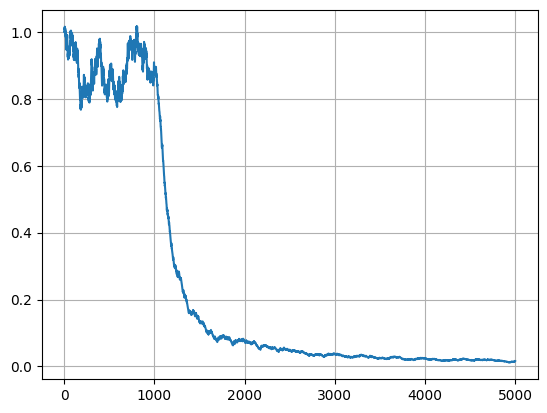

In [160]:
# NumPy kitabxanasını massivlər və riyazi əməliyyatlar üçün idxal edirik
import numpy as np
# Matplotlib kitabxanasından qrafik çəkmək üçün pyplot modulunu idxal edirik
import matplotlib.pyplot as plt
#  Rəqəmləri Elmi notasiya olmadan, sadə formatda göstər
np.set_printoptions(suppress=True, precision=6)


# Sigmoid əsaslı loss (itki) funksiyası təyin edilir
def loss(w, x, y):
    # M — xətti modelin çıxışı ilə y-ni vururuq
    M = np.dot(w, x) * y
    # Sigmoid funksiyası əsasında itki hesablanır
    return 2 / (1 + np.exp(M))

# Sigmoid əsaslı loss funksiyasının çəkilər (w) üzrə törəməsi
def df(w, x, y):
    # L1 cərimə əmsalı (regularization constant)
    L1 = 1.0
    # M yenə model çıxışı ilə y-nin hasilidir
    M = np.dot(w, x) * y
    # Törəmə sigmoid funksiyası üzrə hesablanır və L1 regularizasiya əlavə edilir
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * w*w

# Təlim üçün nümunələr (x_train) — 2 xüsusiyyətlə verilmişdir
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# Hər nümunəyə əlavə olaraq 3 süni xüsusiyyət əlavə edilir (çoxluq səviyyəsində transformasiyalar)
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
# x_train siyahısı NumPy massivinə çevrilir
x_train = np.array(x_train)
# Yəni çıxış dəyərləri (etiketlər) +1 və -1 kimi verilir
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Xüsusiyyətlərin sayı (yəni çəkilərin sayı)
fn = len(x_train[0])
# Təlim nümunələrinin sayı
n_train = len(x_train)
# Çəkilərin başlanğıc qiyməti (sıfırdan başlanır)
w = np.zeros(fn)
# Stoxastik Qradyent Descent üçün öyrənmə sürəti (learning rate)
nt = 0.00001
# Keyfiyyət göstəricisinin (Q) hesablanmasında "keçmişi unutma" əmsalı (lambda)
lm = 0.01
# SGD üçün ümumi iterasiya sayı
N = 5000

# Başlanğıcda modelin orta itkisi (empirik risk)
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])
# Təlim müddətində itki dəyərlərinin izlənməsi üçün siyahı
Q_plot = [Q]

# SGD ilə təlim dövrü
for i in range(N):
    # Təlim dəstindən təsadüfi indeks seçilir
    k = np.random.randint(0, n_train - 1)
    # Seçilmiş nümunə üzrə itki hesablanır
    ek = loss(w, x_train[k], y_train[k])
    # Çəkilər SGD qaydasına əsasən yenilənir
    w = w - nt * df(w, x_train[k], y_train[k])
    # Keyfiyyət göstəricisi (Q) yeni itki ilə yenilənir
    Q = lm * ek + (1 - lm) * Q
    # Q dəyəri qrafik üçün siyahıya əlavə edilir
    Q_plot.append(Q)

# Təlimdən sonra modelin orta empirik riski yenidən hesablanır
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])

# Əldə olunan çəkilər çap olunur
print(f'w: {w}')
# Son empirik risk dəyəri çap olunur
print(f'Q: {Q}')

# Təlim müddətində Q dəyərlərinin dəyişimini vizuallaşdırırıq
plt.plot(Q_plot)
# Qrafikdə şəbəkə xətləri göstərilir
plt.grid(True)
# Qrafik göstərilir
plt.show()